# I- Import data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio

USER = ""
HOSTNAME = ""
PASSWORD = ""
PORT = ""
DATABASE = ""


connection = psycopg2.connect(user = USER, password = PASSWORD, host = HOSTNAME, port = PORT, database = DATABASE)
sql = f"""SELECT * FROM public.bdd_emission_bdf;"""
data = sqlio.read_sql_query(sql, connection)
connection.close()

# II- Data exploration

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
print(data.columns.values)

['id' '2378-TCDD_A' '12378-PeCDD_A' '123478-HxCDD_A' '123678-HxCDD_A'
 '123789-HxCDD_A' '1234678-HpCDD_A' 'OCDD_A' '2378-TCDF_A' '12378-PeCDF_A'
 '23478-PeCDF_A' '123478-HxCDF_A' '123678-HxCDF_A' '234678-HxCDF_A'
 '123789-HxCDF_A' '1234678-HpCDF_A' '1234789-HpCDF_A' 'OCDF_A'
 '2378-TCDD_C' '12378-PeCDD_C' '123478-HxCDD_C' '123678-HxCDD_C'
 '123789-HxCDD_C' '1234678-HpCDD_C' 'OCDD_C' '2378-TCDF_C' '12378-PeCDF_C'
 '23478-PeCDF_C' '123478-HxCDF_C' '123678-HxCDF_C' '234678-HxCDF_C'
 '123789-HxCDF_C' '1234678-HpCDF_C' '1234789-HpCDF_C' 'OCDF_C' 'label']


In [4]:
print(f"This dat contains {len(data)} records.")
print("None values for each column :")
data.isnull().sum()

This dat contains 1971 records.
None values for each column :


id                    0
2378-TCDD_A         120
12378-PeCDD_A       120
123478-HxCDD_A      120
123678-HxCDD_A      120
123789-HxCDD_A      120
1234678-HpCDD_A     120
OCDD_A              120
2378-TCDF_A         120
12378-PeCDF_A       120
23478-PeCDF_A       120
123478-HxCDF_A      120
123678-HxCDF_A      120
234678-HxCDF_A      120
123789-HxCDF_A      120
1234678-HpCDF_A     120
1234789-HpCDF_A     120
OCDF_A              120
2378-TCDD_C        1058
12378-PeCDD_C      1058
123478-HxCDD_C     1058
123678-HxCDD_C     1058
123789-HxCDD_C     1058
1234678-HpCDD_C    1058
OCDD_C             1058
2378-TCDF_C        1058
12378-PeCDF_C      1058
23478-PeCDF_C      1058
123478-HxCDF_C     1058
123678-HxCDF_C     1058
234678-HxCDF_C     1058
123789-HxCDF_C     1058
1234678-HpCDF_C    1058
1234789-HpCDF_C    1058
OCDF_C             1058
label                 0
dtype: int64

In [5]:
data_ = data.dropna()

In [6]:
print(f"This dat contains {len(data_)} records.")
print("None values for each column :")
data_.isnull().sum()

This dat contains 913 records.
None values for each column :


id                 0
2378-TCDD_A        0
12378-PeCDD_A      0
123478-HxCDD_A     0
123678-HxCDD_A     0
123789-HxCDD_A     0
1234678-HpCDD_A    0
OCDD_A             0
2378-TCDF_A        0
12378-PeCDF_A      0
23478-PeCDF_A      0
123478-HxCDF_A     0
123678-HxCDF_A     0
234678-HxCDF_A     0
123789-HxCDF_A     0
1234678-HpCDF_A    0
1234789-HpCDF_A    0
OCDF_A             0
2378-TCDD_C        0
12378-PeCDD_C      0
123478-HxCDD_C     0
123678-HxCDD_C     0
123789-HxCDD_C     0
1234678-HpCDD_C    0
OCDD_C             0
2378-TCDF_C        0
12378-PeCDF_C      0
23478-PeCDF_C      0
123478-HxCDF_C     0
123678-HxCDF_C     0
234678-HxCDF_C     0
123789-HxCDF_C     0
1234678-HpCDF_C    0
1234789-HpCDF_C    0
OCDF_C             0
label              0
dtype: int64

In [7]:
data_.describe()

,2378-TCDD_A,12378-PeCDD_A,123478-HxCDD_A,123678-HxCDD_A,123789-HxCDD_A,1234678-HpCDD_A,OCDD_A,2378-TCDF_A,12378-PeCDF_A,23478-PeCDF_A,...,2378-TCDF_C,12378-PeCDF_C,23478-PeCDF_C,123478-HxCDF_C,123678-HxCDF_C,234678-HxCDF_C,123789-HxCDF_C,1234678-HpCDF_C,1234789-HpCDF_C,OCDF_C
count,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,...,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000
mean,0.002355,0.007441,0.008228,0.014660,0.014801,0.160185,0.525045,0.040746,0.013047,0.020083,...,0.050054,0.044890,0.074774,0.107356,0.078047,0.104259,0.016140,0.566854,0.064598,0.057173
std,0.006319,0.008385,0.007037,0.010637,0.014023,0.064336,0.214183,0.099085,0.020338,0.029028,...,0.064727,0.026709,0.049919,0.077845,0.033036,0.060763,0.031866,0.173596,0.041452,0.053589
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000400,0.003441,0.005168,0.009526,0.009268,0.131804,0.368828,0.002486,0.002340,0.004131,...,0.022306,0.032696,0.053442,0.068972,0.061991,0.071748,0.000000,0.517085,0.045609,0.000000
50%,0.000845,0.005280,0.006954,0.012821,0.012415,0.168042,0.618919,0.005106,0.004719,0.007877,...,0.027234,0.042998,0.073680,0.089201,0.078949,0.105000,0.007817,0.579910,0.067738,0.059497
75%,0.001812,0.008501,0.009441,0.016795,0.016093,0.196924,0.677528,0.013911,0.013199,0.020068,...,0.037568,0.053571,0.088113,0.112327,0.092344,0.129332,0.016630,0.648184,0.082645,0.088059
max,0.090502,0.084595,0.089124,0.070193,0.265884,0.434389,0.936916,0.857291,0.201316,0.166667,...,0.543750,0.297210,1.000000,0.636318,0.222312,0.594406,0.409091,1.000000,0.380952,0.459146


In [8]:
data.describe()

,2378-TCDD_A,12378-PeCDD_A,123478-HxCDD_A,123678-HxCDD_A,123789-HxCDD_A,1234678-HpCDD_A,OCDD_A,2378-TCDF_A,12378-PeCDF_A,23478-PeCDF_A,...,2378-TCDF_C,12378-PeCDF_C,23478-PeCDF_C,123478-HxCDF_C,123678-HxCDF_C,234678-HxCDF_C,123789-HxCDF_C,1234678-HpCDF_C,1234789-HpCDF_C,OCDF_C
count,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,...,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000
mean,0.005415,0.008974,0.009794,0.016761,0.018392,0.143790,0.394227,0.102048,0.024123,0.036664,...,0.050054,0.044890,0.074774,0.107356,0.078047,0.104259,0.016140,0.566854,0.064598,0.057173
std,0.025495,0.016450,0.012191,0.017802,0.026763,0.100282,0.267602,0.192023,0.046327,0.048713,...,0.064727,0.026709,0.049919,0.077845,0.033036,0.060763,0.031866,0.173596,0.041452,0.053589
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.006041,0.004536,0.071365,0.140315,0.003279,0.002088,0.004372,...,0.022306,0.032696,0.053442,0.068972,0.061991,0.071748,0.000000,0.517085,0.045609,0.000000
50%,0.000801,0.005212,0.006842,0.012677,0.012557,0.147549,0.372473,0.011787,0.008507,0.015972,...,0.027234,0.042998,0.073680,0.089201,0.078949,0.105000,0.007817,0.579910,0.067738,0.059497
75%,0.003165,0.012311,0.012407,0.021568,0.024471,0.192520,0.646980,0.101718,0.033771,0.055454,...,0.037568,0.053571,0.088113,0.112327,0.092344,0.129332,0.016630,0.648184,0.082645,0.088059
max,0.704807,0.385119,0.110280,0.164762,0.409518,1.000000,1.000000,1.000000,1.000000,0.530794,...,0.543750,0.297210,1.000000,0.636318,0.222312,0.594406,0.409091,1.000000,0.380952,0.459146


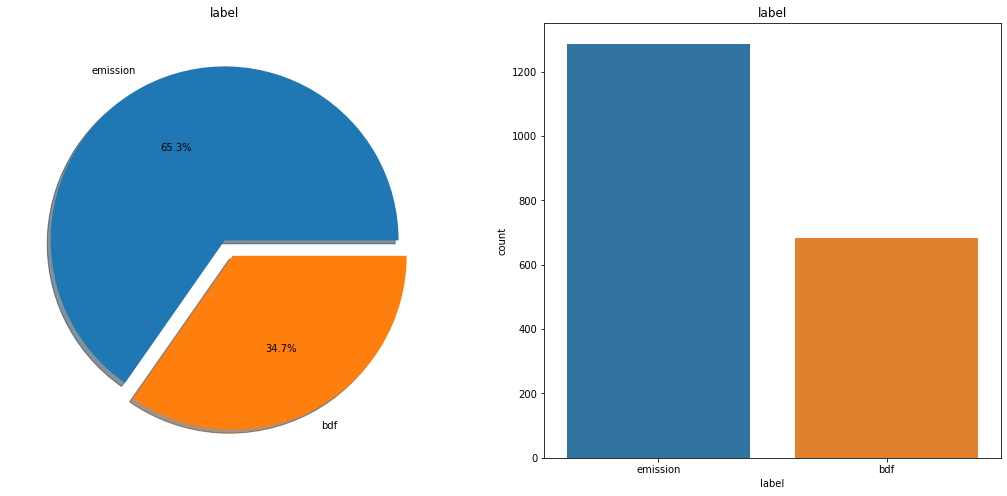

In [9]:
# Number of classes in data
f,ax=plt.subplots(1,2,figsize=(18,8))
data['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('label')
ax[0].set_ylabel('')
sns.countplot('label',data=data,ax=ax[1])
ax[1].set_title('label')
plt.show()

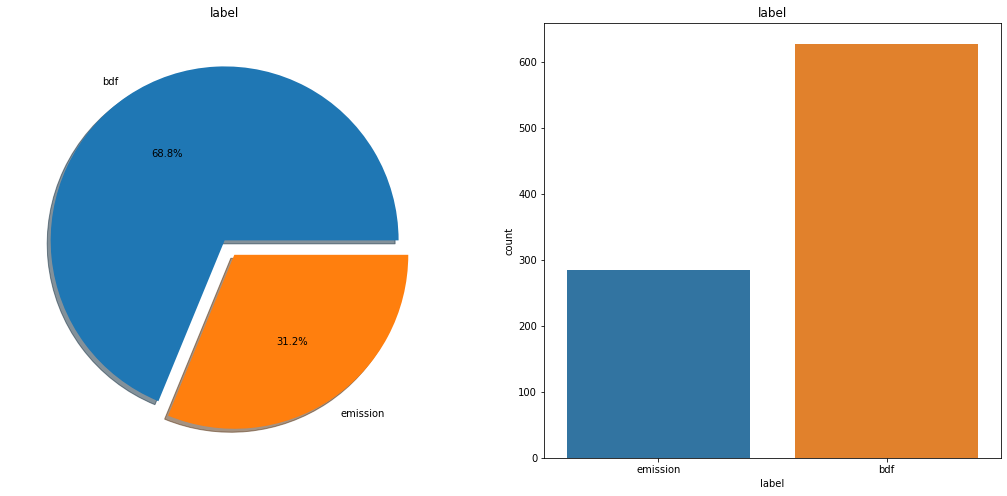

In [10]:
# number of classes in data_
f,ax=plt.subplots(1,2,figsize=(18,8))
data_['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('label')
ax[0].set_ylabel('')
sns.countplot('label',data=data_,ax=ax[1])
ax[1].set_title('label')
plt.show()

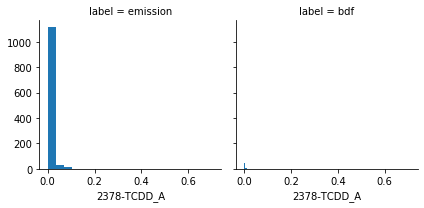

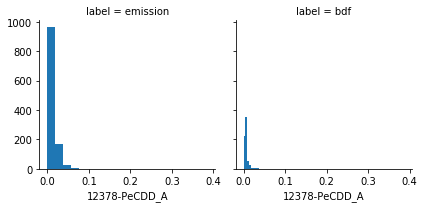

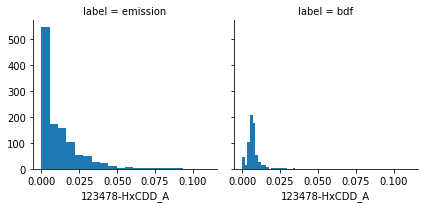

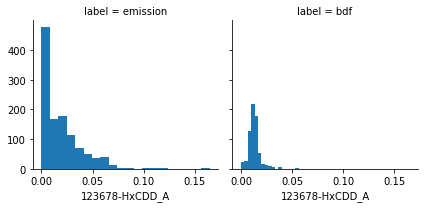

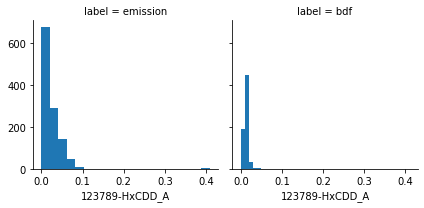

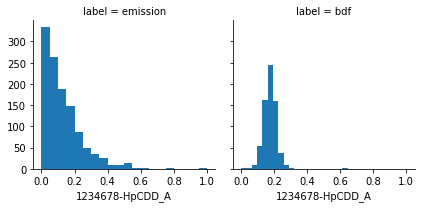

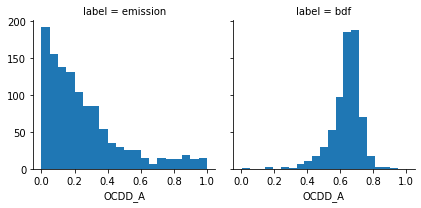

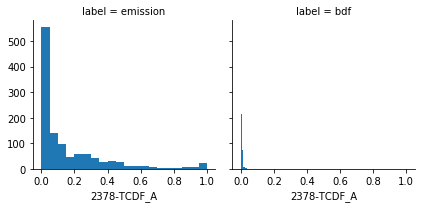

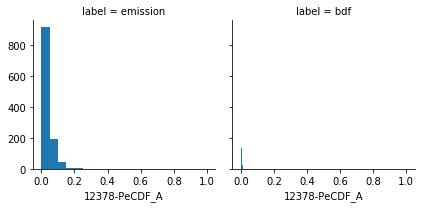

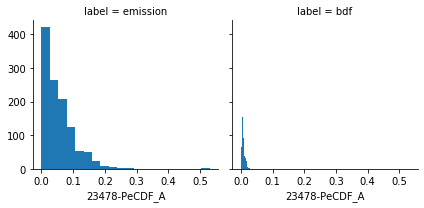

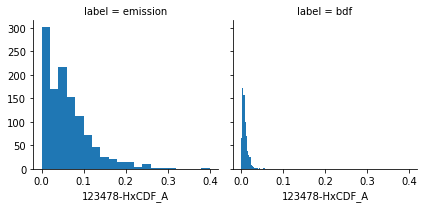

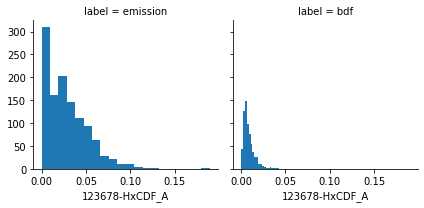

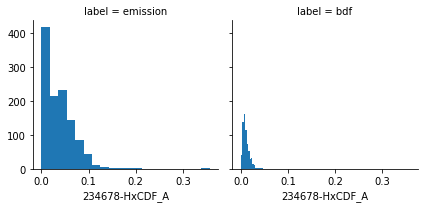

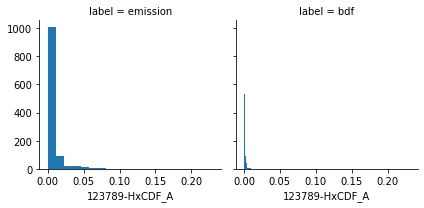

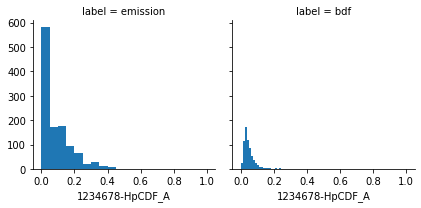

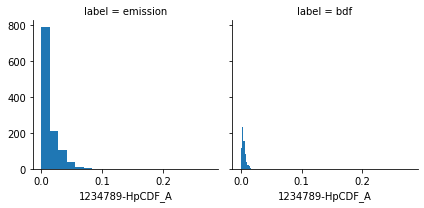

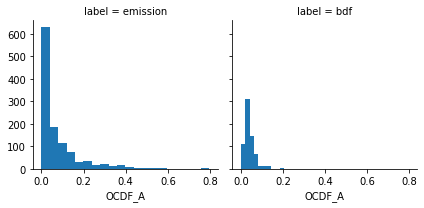

In [11]:
# A normalisation features distributions for each class for data
congenere = ['2378-TCDD_A', '12378-PeCDD_A', '123478-HxCDD_A', '123678-HxCDD_A',
       '123789-HxCDD_A', '1234678-HpCDD_A', 'OCDD_A', '2378-TCDF_A',
       '12378-PeCDF_A', '23478-PeCDF_A', '123478-HxCDF_A', '123678-HxCDF_A',
       '234678-HxCDF_A', '123789-HxCDF_A', '1234678-HpCDF_A',
       '1234789-HpCDF_A', 'OCDF_A']

for i in congenere:
    g = sns.FacetGrid(data, col='label')
    g.map(plt.hist, i, bins=20)

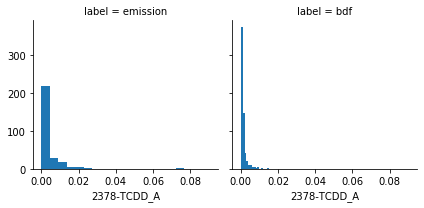

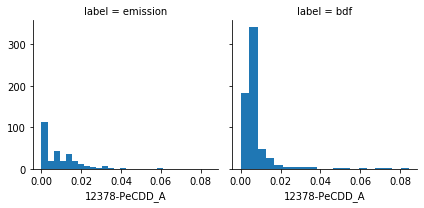

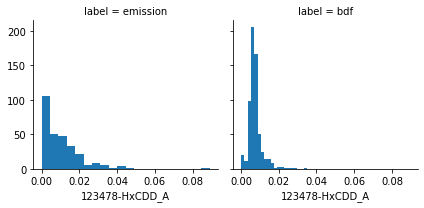

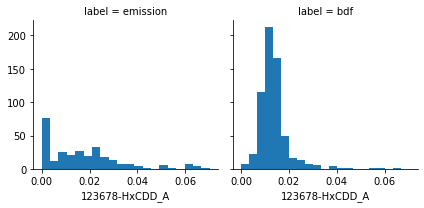

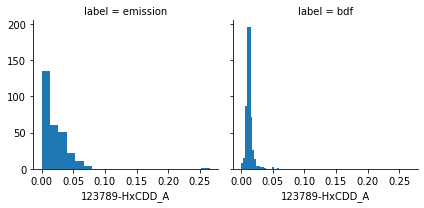

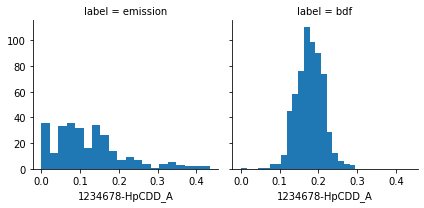

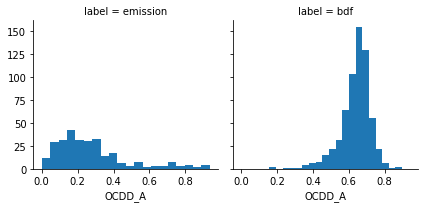

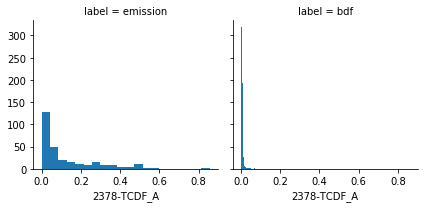

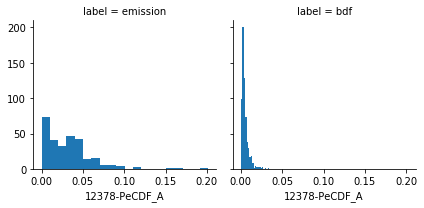

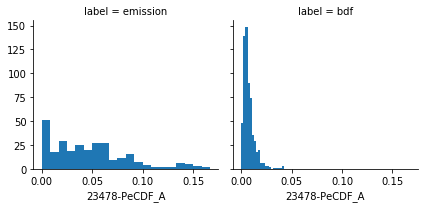

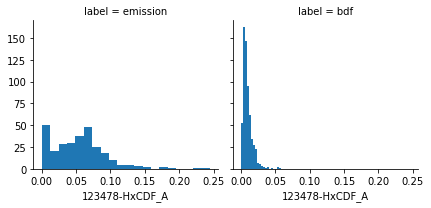

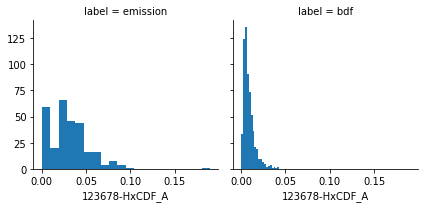

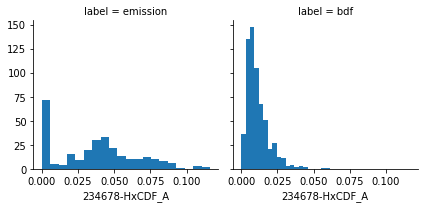

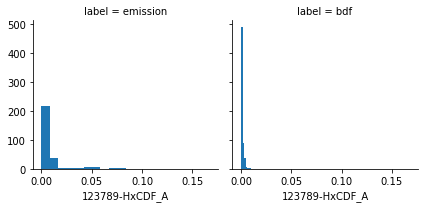

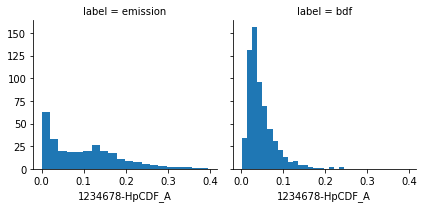

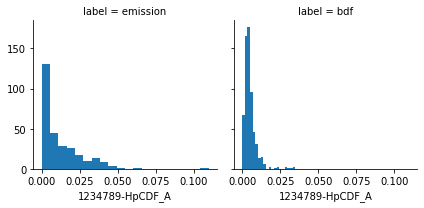

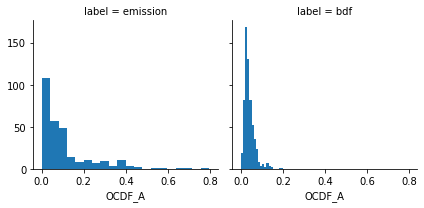

In [12]:
# A normalisation features distributions for each class for data_
congenere = ['2378-TCDD_A', '12378-PeCDD_A', '123478-HxCDD_A', '123678-HxCDD_A',
       '123789-HxCDD_A', '1234678-HpCDD_A', 'OCDD_A', '2378-TCDF_A',
       '12378-PeCDF_A', '23478-PeCDF_A', '123478-HxCDF_A', '123678-HxCDF_A',
       '234678-HxCDF_A', '123789-HxCDF_A', '1234678-HpCDF_A',
       '1234789-HpCDF_A', 'OCDF_A']

for i in congenere:
    g = sns.FacetGrid(data_, col='label')
    g.map(plt.hist, i, bins=20)

# III- Data preparation

In [13]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [14]:
data['label'] = data['label'].map({'emission': 1, 'bdf': 0})
data_['label'] = data_['label'].map({'emission': 1, 'bdf': 0})

# IV- Classification using all features (Method A and C)

In [15]:
train,test=train_test_split(data_,test_size=0.3,random_state=0,stratify=data_['label'])
train_X=train[train.columns[1:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[1:-1]]
test_Y=test[test.columns[-1:]]
X=data_[data_.columns[1:]]
Y=data_['label']

In [16]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.9927007299270073


In [17]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.9890510948905109


In [18]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.9963503649635036


In [19]:
model=DecisionTreeClassifier(max_leaf_nodes=2)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 1.0


In [20]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 1.0


In [21]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 1.0


In [22]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 1.0


In [23]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,1.000000,0.000000
Radial Svm,1.000000,0.000000
Logistic Regression,1.000000,0.000000
KNN,1.000000,0.000000
Decision Tree,0.997802,0.004396
Naive Bayes,1.000000,0.000000
Random Forest,0.998901,0.003297


# V- Split features of the two methods A & C

In [24]:
congeneres_C = ['2378-TCDD_C', '12378-PeCDD_C',
       '123478-HxCDD_C', '123678-HxCDD_C', '123789-HxCDD_C', '1234678-HpCDD_C',
       'OCDD_C', '2378-TCDF_C', '12378-PeCDF_C', '23478-PeCDF_C',
       '123478-HxCDF_C', '123678-HxCDF_C', '234678-HxCDF_C', '123789-HxCDF_C',
       '1234678-HpCDF_C', '1234789-HpCDF_C', 'OCDF_C']
congeneres_A = ['2378-TCDD_A', '12378-PeCDD_A', '123478-HxCDD_A', '123678-HxCDD_A',
       '123789-HxCDD_A', '1234678-HpCDD_A', 'OCDD_A', '2378-TCDF_A',
       '12378-PeCDF_A', '23478-PeCDF_A', '123478-HxCDF_A', '123678-HxCDF_A',
       '234678-HxCDF_A', '123789-HxCDF_A', '1234678-HpCDF_A',
       '1234789-HpCDF_A', 'OCDF_A']

## 1- Method A

{'emission': 1, 'bdf': 0}


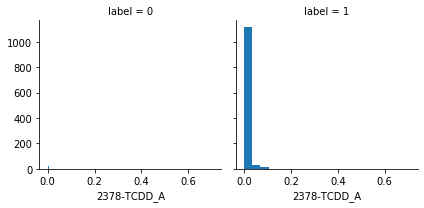

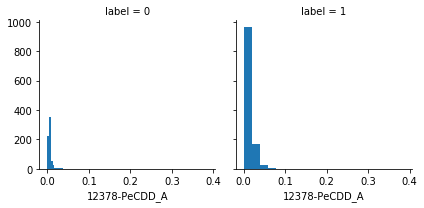

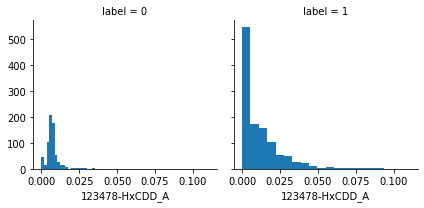

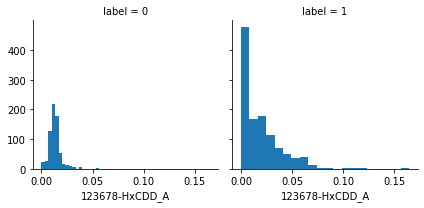

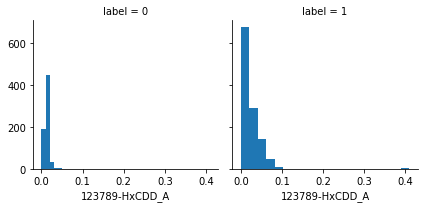

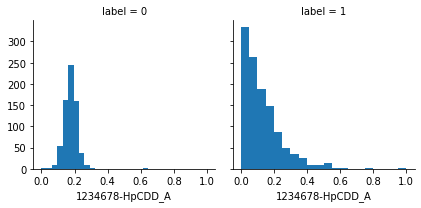

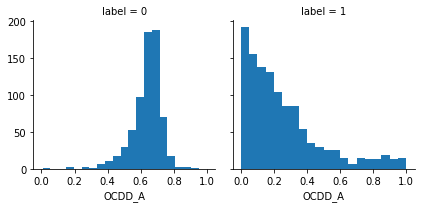

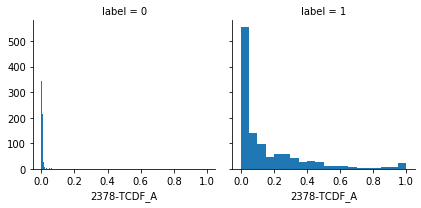

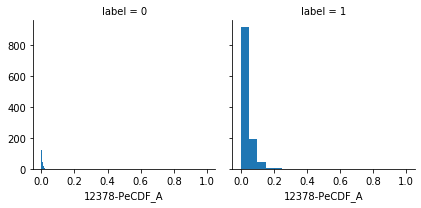

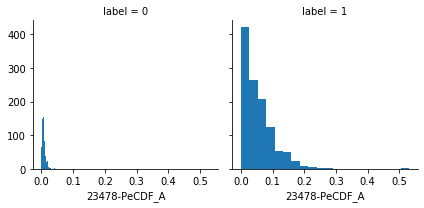

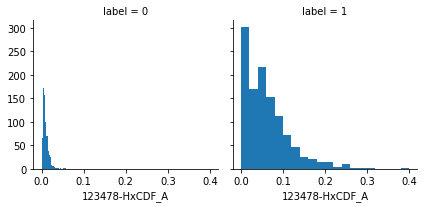

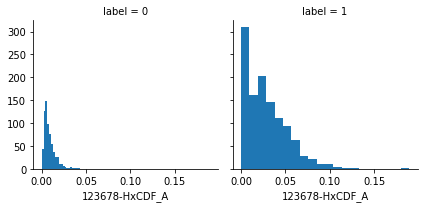

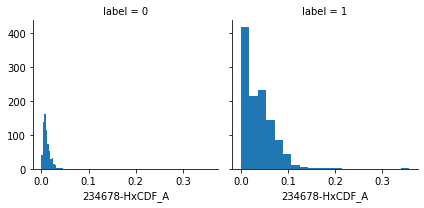

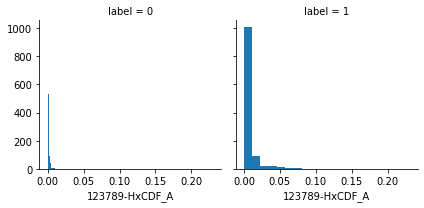

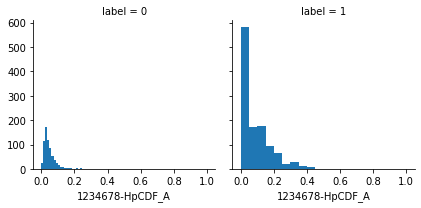

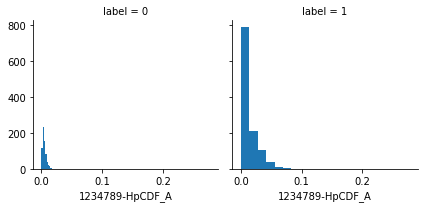

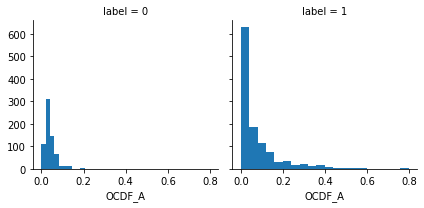

In [25]:
# use method A features and drop none values
print({'emission': 1, 'bdf': 0})
data_A = data[['id']+congeneres_A+['label']].dropna()
for i in congeneres_A:
    g = sns.FacetGrid(data_A, col='label')
    g.map(plt.hist, i, bins=20)

{'emission': 1, 'bdf': 0}


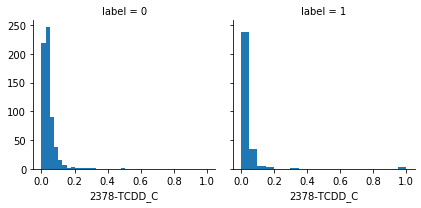

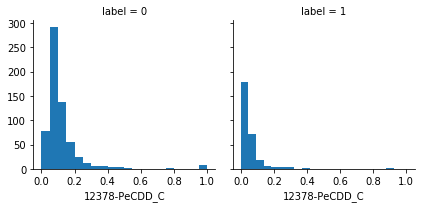

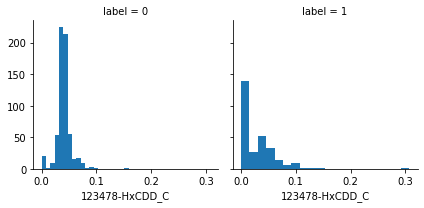

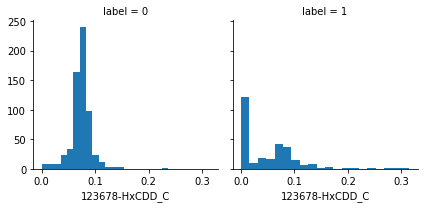

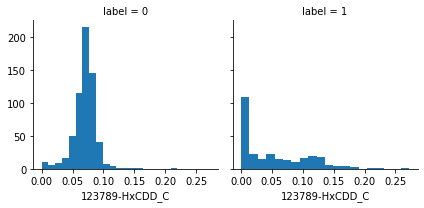

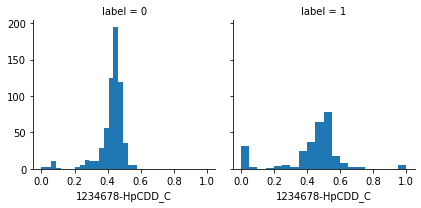

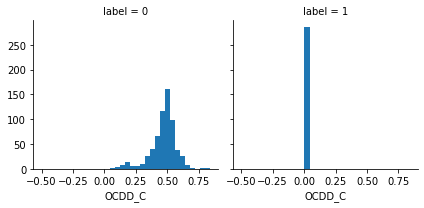

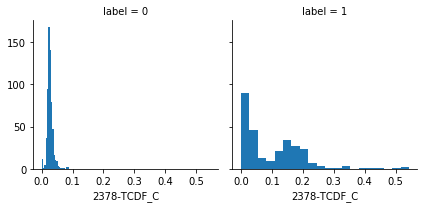

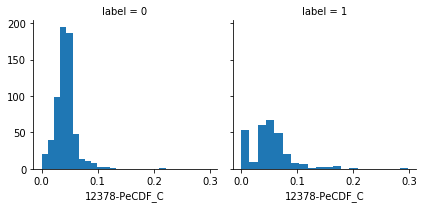

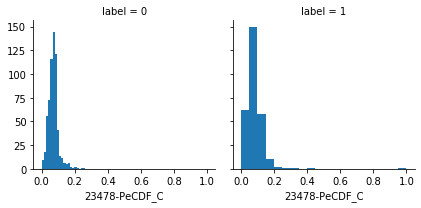

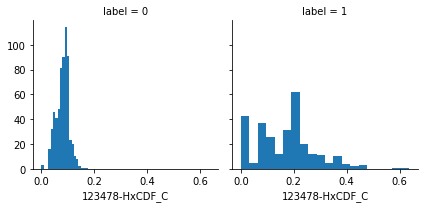

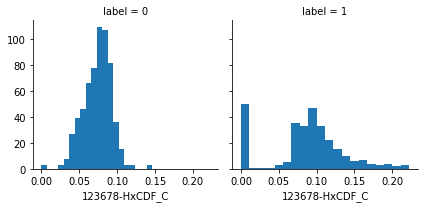

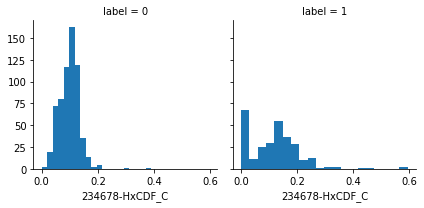

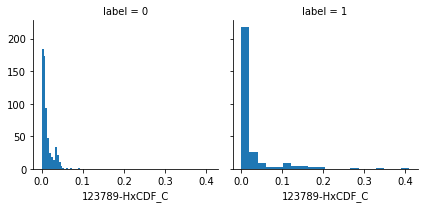

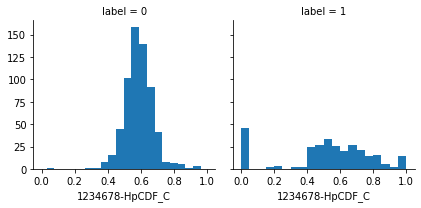

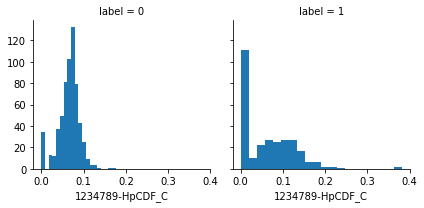

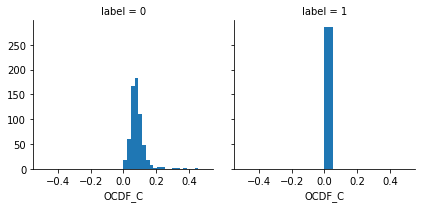

In [26]:
# use method C features and drop none values
print({'emission': 1, 'bdf': 0})
data_C = data[['id']+congeneres_C+['label']].dropna()
for i in congeneres_C:
    g = sns.FacetGrid(data_C, col='label')
    g.map(plt.hist, i, bins=20)

# VI- Classification with method A features 

In [51]:
data_A = data_A.sample(len(data_A))

In [52]:
train,test=train_test_split(data_A,test_size=0.3,random_state=0,stratify=data_A['label'])
train_X=train[train.columns[1:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[1:-1]]
test_Y=test[test.columns[-1:]]
X=data_A[data_A.columns[1:]]
Y=data_A['label']

In [53]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.9028776978417267


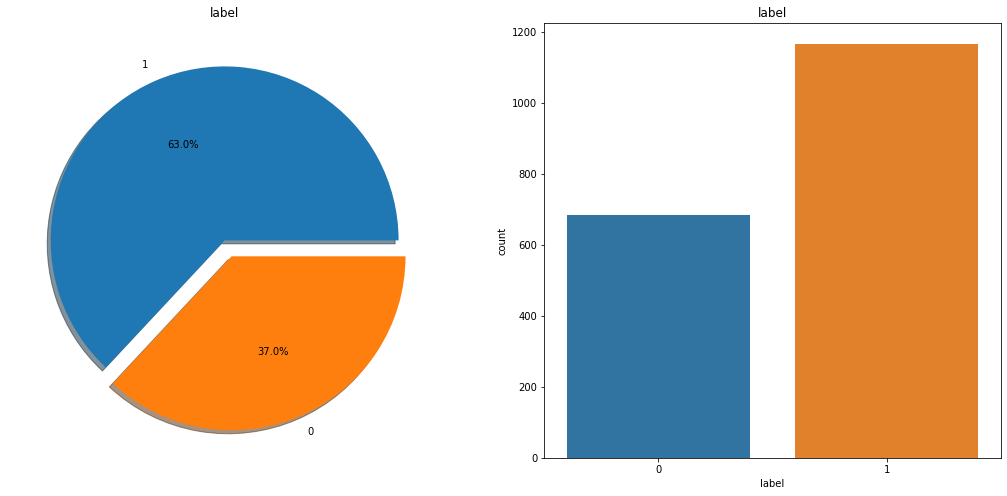

In [54]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data_A['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('label')
ax[0].set_ylabel('')
sns.countplot('label',data=data_A,ax=ax[1])
ax[1].set_title('label')
plt.show()

In [55]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.9028776978417267


In [56]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.9046762589928058


In [57]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8938848920863309


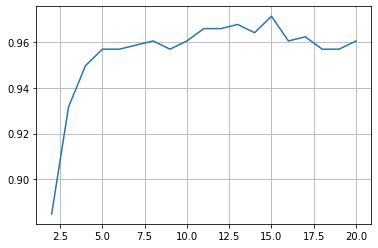

In [58]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.grid()

In [59]:
model=DecisionTreeClassifier(max_leaf_nodes=5)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.9568345323741008


In [62]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_A
1 12378-PeCDD_A
2 123478-HxCDD_A
3 123678-HxCDD_A
4 123789-HxCDD_A
5 1234678-HpCDD_A
6 OCDD_A
7 2378-TCDF_A
8 12378-PeCDF_A
9 23478-PeCDF_A
10 123478-HxCDF_A
11 123678-HxCDF_A
12 234678-HxCDF_A
13 123789-HxCDF_A
14 1234678-HpCDF_A
15 1234789-HpCDF_A
16 OCDF_A


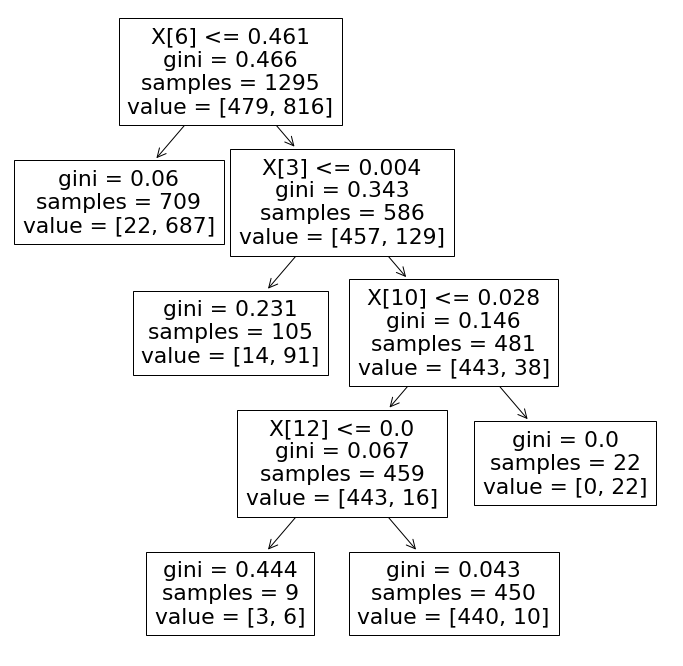

In [61]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
_=tree.plot_tree(model)

In [36]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.9748201438848921


In [37]:
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=5, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
#     print("Accuracy from each of 5 folds: ", cv_result)
#     print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (cv_result.mean()*100.0, cv_result.std()*100.0))
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,1.0,0.0
Radial Svm,1.0,0.0
Logistic Regression,1.0,0.0
KNN,1.0,0.0
Decision Tree,1.0,0.0
Naive Bayes,1.0,0.0
Random Forest,1.0,0.0


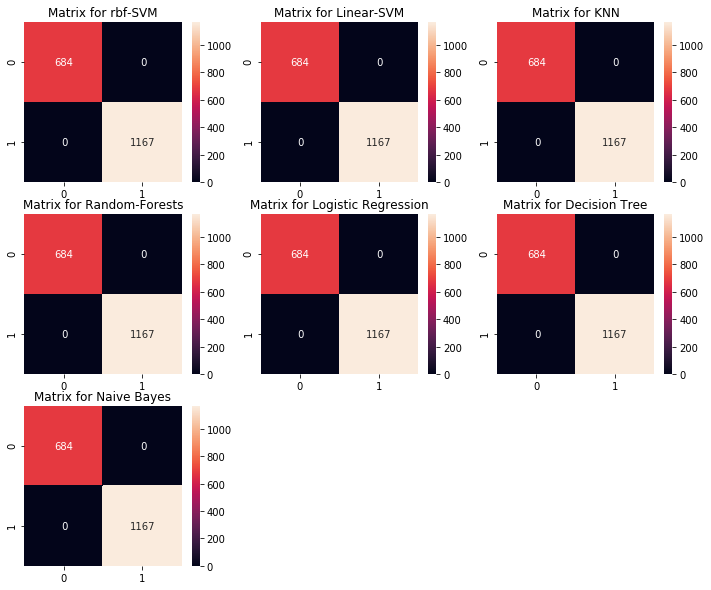

In [38]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
f.delaxes(ax[2,1])
f.delaxes(ax[2,2])
plt.show()

# VII- Classification with method C features

In [64]:
data_C = data_C.sample(len(data_C))

In [65]:
train,test=train_test_split(data_C,test_size=0.3,random_state=0,stratify=data_C['label'])
train_X=train[train.columns[1:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[1:-1]]
test_Y=test[test.columns[-1:]]
X=data_C[data_C.columns[1:]]
Y=data_C['label']

In [66]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.9927007299270073


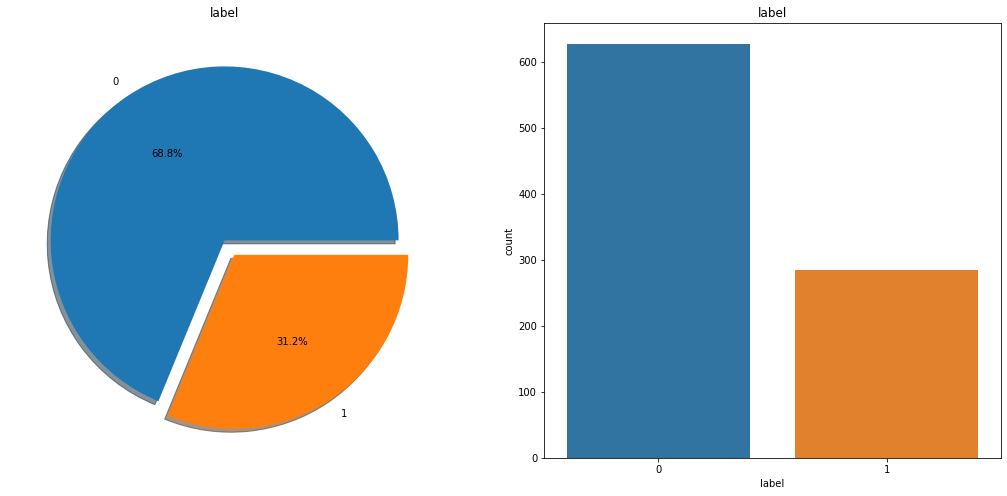

In [67]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data_C['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('label')
ax[0].set_ylabel('')
sns.countplot('label',data=data_C,ax=ax[1])
ax[1].set_title('label')
plt.show()

In [68]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.9927007299270073


In [69]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.9963503649635036


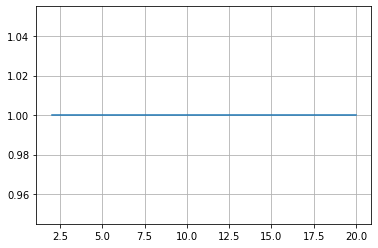

In [70]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.grid()

In [45]:
model=DecisionTreeClassifier(max_leaf_nodes=2)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.9963503649635036


In [72]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_C
1 12378-PeCDD_C
2 123478-HxCDD_C
3 123678-HxCDD_C
4 123789-HxCDD_C
5 1234678-HpCDD_C
6 OCDD_C
7 2378-TCDF_C
8 12378-PeCDF_C
9 23478-PeCDF_C
10 123478-HxCDF_C
11 123678-HxCDF_C
12 234678-HxCDF_C
13 123789-HxCDF_C
14 1234678-HpCDF_C
15 1234789-HpCDF_C
16 OCDF_C


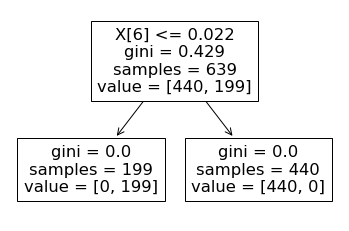

In [71]:
from sklearn import tree
_=tree.plot_tree(model)

In [47]:
train_X

,2378-TCDD_C,12378-PeCDD_C,123478-HxCDD_C,123678-HxCDD_C,123789-HxCDD_C,1234678-HpCDD_C,OCDD_C,2378-TCDF_C,12378-PeCDF_C,23478-PeCDF_C,123478-HxCDF_C,123678-HxCDF_C,234678-HxCDF_C,123789-HxCDF_C,1234678-HpCDF_C,1234789-HpCDF_C,OCDF_C
1479,0.037723,0.071084,0.038875,0.063409,0.058475,0.407450,0.361109,0.043434,0.053231,0.079097,0.103868,0.091529,0.096277,0.006770,0.633557,0.061947,0.014917
1859,0.031870,0.056219,0.018517,0.031170,0.032155,0.370722,0.342421,0.000000,0.064269,0.077010,0.089201,0.075929,0.073459,0.000000,0.691958,0.067119,0.061845
1912,0.015412,0.061167,0.039705,0.077177,0.074172,0.417626,0.538750,0.019764,0.046003,0.083866,0.099091,0.086296,0.157960,0.016350,0.711476,0.085471,0.086544
1684,0.018530,0.068070,0.038727,0.072420,0.076010,0.425698,0.524822,0.023540,0.042565,0.079255,0.088072,0.085860,0.123666,0.013790,0.650609,0.087442,0.095425
1405,0.026972,0.097306,0.037437,0.070267,0.073239,0.423353,0.523401,0.023348,0.046199,0.083008,0.095379,0.084592,0.128402,0.016492,0.648715,0.083275,0.109430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,0.046939,0.047613,0.035094,0.060252,0.051447,0.420000,0.290787,0.032586,0.045769,0.058077,0.077419,0.078065,0.080645,0.000000,0.547535,0.070775,0.022894
1247,0.000000,0.000000,0.000000,0.000000,0.000000,0.040816,0.000000,0.350785,0.106749,0.082645,0.000000,0.211905,0.000000,0.186905,0.000000,0.000000,0.000000
1922,0.094038,0.154186,0.050106,0.089643,0.083532,0.452956,0.507278,0.027011,0.021391,0.033379,0.052827,0.050849,0.055315,0.002552,0.538149,0.041304,0.046313
903,0.053713,0.088033,0.039807,0.085325,0.107538,0.510323,0.000000,0.031913,0.065965,0.076811,0.187733,0.097614,0.129193,0.006830,0.613526,0.060499,0.000000


In [48]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 1.0


In [49]:
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=5, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
#     print("Accuracy from each of 5 folds: ", cv_result)
#     print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (cv_result.mean()*100.0, cv_result.std()*100.0))
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,1.000000,0.000000
Radial Svm,1.000000,0.000000
Logistic Regression,1.000000,0.000000
KNN,1.000000,0.000000
Decision Tree,1.000000,0.000000
Naive Bayes,1.000000,0.000000
Random Forest,0.998907,0.002186


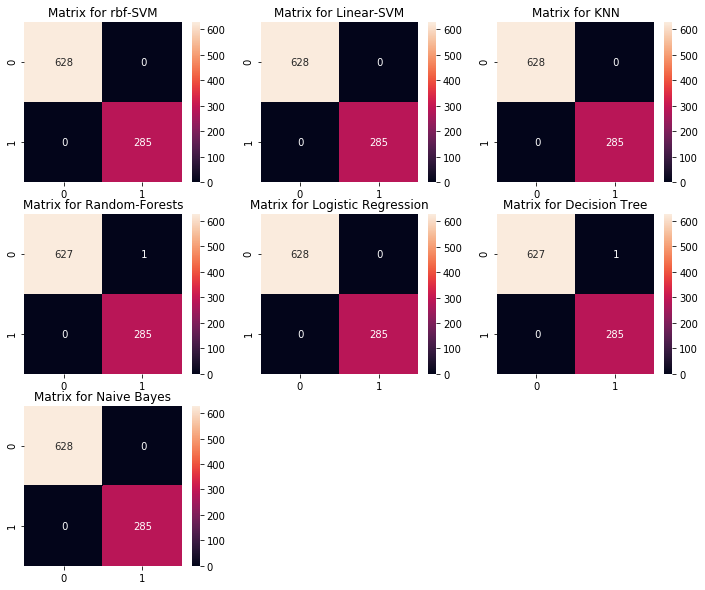

In [50]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
f.delaxes(ax[2,1])
f.delaxes(ax[2,2])
plt.show()